In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("car_price.csv")

In [2]:
df.head()

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.shape

(892, 5)

In [4]:
df.columns

Index(['name', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [5]:
df.isnull().sum()

name           0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [6]:
(df.isnull().sum()/df.shape[0])*100

name          0.000000
year          0.000000
Price         0.000000
kms_driven    5.829596
fuel_type     6.165919
dtype: float64

In [7]:
df.dropna(inplace=True)

In [8]:
#Companyname
def company_name(x):
    return x[:x.index(" ")]

In [9]:
def car_name(x):
    return x[x.index(" ")+1:]
    

In [10]:
df["Company"] = df["name"].apply(company_name)
df['Car'] = df["name"].apply(car_name)

In [11]:
df.head()

,name,year,Price,kms_driven,fuel_type,Company,Car
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000,"45,000 kms",Petrol,Hyundai,Santro Xing XO eRLX Euro III
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel,Mahindra,Jeep CL550 MDI
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol,Maruti,Suzuki Alto 800 Vxi
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol,Hyundai,Grand i10 Magna 1.2 Kappa VTVT
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel,Ford,EcoSport Titanium 1.5L TDCi


In [12]:
#Price
df["Price"] = df["Price"].str.replace(",","")

In [13]:
def rupe_change(x):
    p = x.split(" ")
    try:
        if p[1] == "Lakh":
            return str(round(float(p[0])*100000,1))
        elif p[1] == "Crore":
            return str(round(float(p[0])*100000,1))
        elif p[1] == "Ask For Price": 
            return 2*10000
    except:
        return x

In [14]:
df["Price"] = df["Price"].apply(rupe_change)
df["Price"] = df["Price"].astype("float64")

In [15]:
df.dropna(inplace=True)

In [16]:
df.head()

,name,year,Price,kms_driven,fuel_type,Company,Car
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000.0,"45,000 kms",Petrol,Hyundai,Santro Xing XO eRLX Euro III
1,Mahindra Jeep CL550 MDI,2006,425000.0,40 kms,Diesel,Mahindra,Jeep CL550 MDI
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000.0,"28,000 kms",Petrol,Hyundai,Grand i10 Magna 1.2 Kappa VTVT
4,Ford EcoSport Titanium 1.5L TDCi,2014,575000.0,"36,000 kms",Diesel,Ford,EcoSport Titanium 1.5L TDCi
6,Ford Figo,2012,175000.0,"41,000 kms",Diesel,Ford,Figo


In [17]:
#kms_driven
df["kms_driven"] = df["kms_driven"].str.replace(",","")


In [18]:
df["kms_driven"] = df["kms_driven"].str.replace(" kms","")

In [19]:
df["kms_driven"] = df["kms_driven"].astype("int64")

In [20]:
df.head()

,name,year,Price,kms_driven,fuel_type,Company,Car
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000.0,45000,Petrol,Hyundai,Santro Xing XO eRLX Euro III
1,Mahindra Jeep CL550 MDI,2006,425000.0,40,Diesel,Mahindra,Jeep CL550 MDI
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000.0,28000,Petrol,Hyundai,Grand i10 Magna 1.2 Kappa VTVT
4,Ford EcoSport Titanium 1.5L TDCi,2014,575000.0,36000,Diesel,Ford,EcoSport Titanium 1.5L TDCi
6,Ford Figo,2012,175000.0,41000,Diesel,Ford,Figo


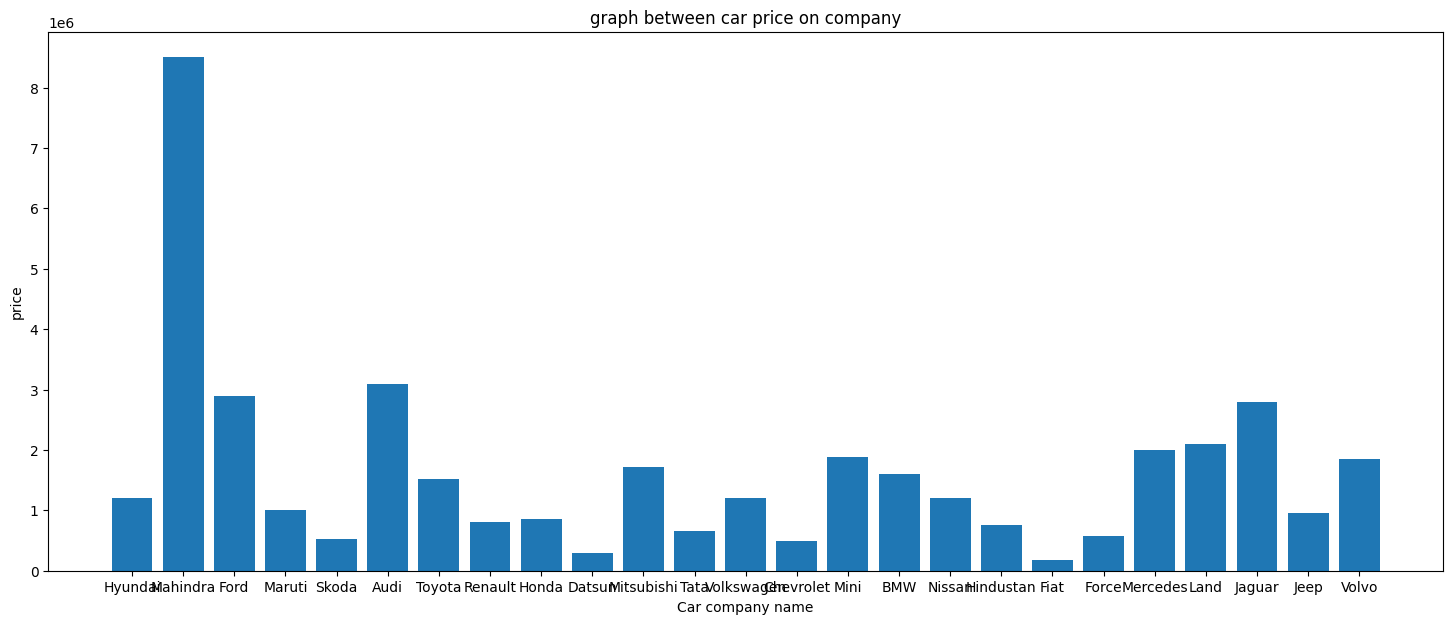

In [52]:
plt.figure(figsize=[18,7])
plt.bar(df["Company"],df["Price"])
plt.title("graph between car price on company")
plt.ylabel("price")
plt.xlabel("Car company name")
plt.show()

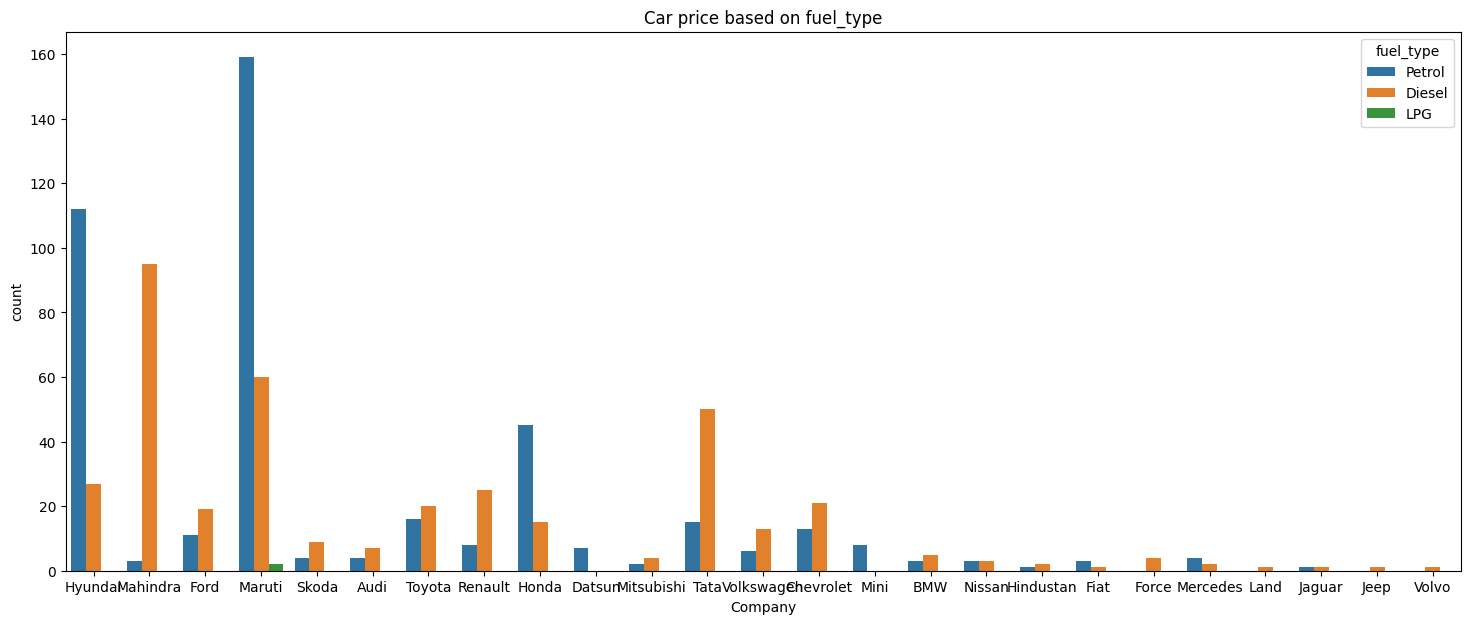

In [21]:
plt.figure(figsize=[18,7])
sns.countplot(x="Company", data=df,hue="fuel_type")
plt.title("Car price based on fuel_type")
plt.show()

In [32]:
group_by = df.groupby(['fuel_type']).max("Price")

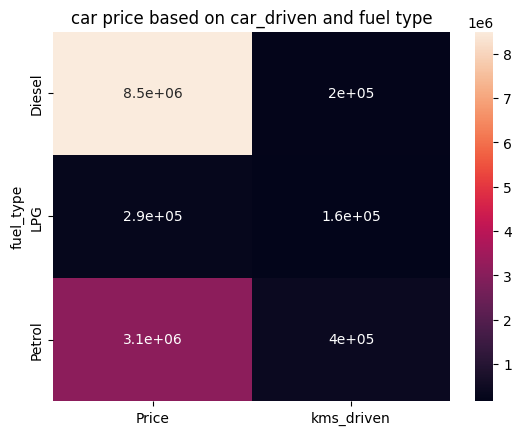

In [44]:
sns.heatmap(data=group_by,annot=group_by)
plt.title("car price based on car_driven and fuel type")
plt.show()

<Figure size 1700x700 with 0 Axes>

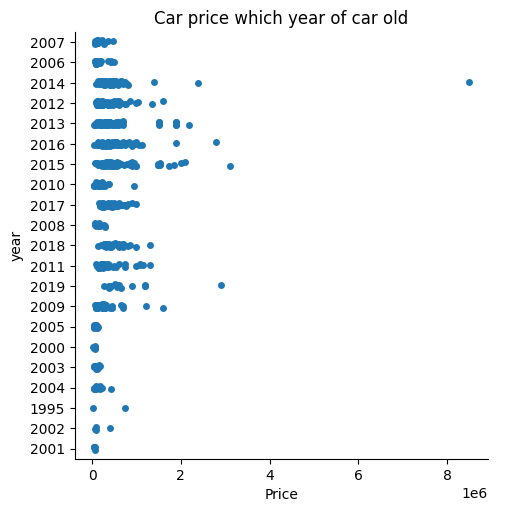

In [53]:
plt.figure(figsize=(17,7))
sns.catplot(x=df['Price'],y=df['year'])
plt.title("Car price which year of car old")
plt.show()

In [47]:
df.head()

,name,year,Price,kms_driven,fuel_type,Company,Car
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000.0,45000,Petrol,Hyundai,Santro Xing XO eRLX Euro III
1,Mahindra Jeep CL550 MDI,2006,425000.0,40,Diesel,Mahindra,Jeep CL550 MDI
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000.0,28000,Petrol,Hyundai,Grand i10 Magna 1.2 Kappa VTVT
4,Ford EcoSport Titanium 1.5L TDCi,2014,575000.0,36000,Diesel,Ford,EcoSport Titanium 1.5L TDCi
6,Ford Figo,2012,175000.0,41000,Diesel,Ford,Figo
